# Classification Algorithms
In this notebook, we will use 3 different classification algorithms namely, Naive Bayes, K-Nearest Neighbors and Multi-Class Logistic Regression to classify the Iris Datset.

## Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('Iris.csv', index_col='Id')

#### Let's now see how the data looks like.

In [4]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
27,5.0,3.4,1.6,0.4,Iris-setosa
85,5.4,3.0,4.5,1.5,Iris-versicolor
41,5.0,3.5,1.3,0.3,Iris-setosa
22,5.1,3.7,1.5,0.4,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
99,5.1,2.5,3.0,1.1,Iris-versicolor
50,5.0,3.3,1.4,0.2,Iris-setosa
80,5.7,2.6,3.5,1.0,Iris-versicolor
140,6.9,3.1,5.4,2.1,Iris-virginica


#### Let's see the number of records and the number and datatype of features.

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


#### Let's look for missing values in the dataset.

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Let's look for duplicated rows and delete them.

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(147, 5)

## Data Visualizations
Let's visualise our data to understand it better.

### 1. Scatter plot between Petal Length and Petal Width.

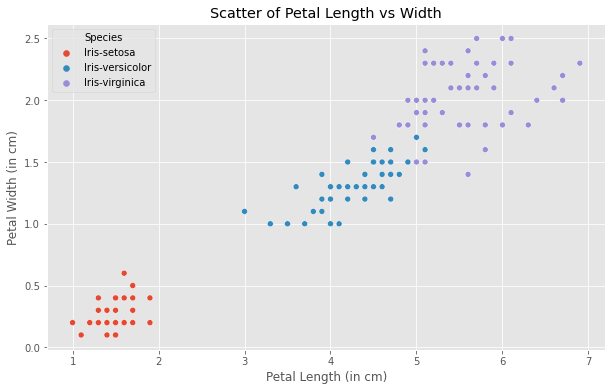

In [11]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.title('Scatter of Petal Length vs Width')
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.show()

`Inference`:
- All the three Species can be seen as clusters on the scatterplot.
- Petal Length and Petal Width are very different for Setosa, compared to the rest.
- Even though, for Versicolor and Virginica, the separation is not huge as Setosa, still there is enough separation to tell both apart.

### 2. Distributions of the Petal Length and Width

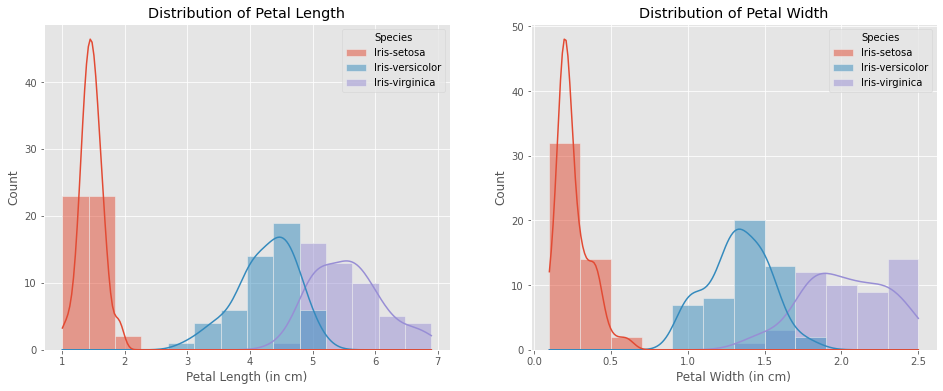

In [12]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.histplot(x='PetalLengthCm', data=df, bins=14, kde=True, ax=ax[0], hue='Species')
ax[0].set_title('Distribution of Petal Length')
ax[0].set_xlabel('Petal Length (in cm)')

sns.histplot(x='PetalWidthCm', data=df, bins=12, kde=True, ax=ax[1], hue='Species')
ax[1].set_title('Distribution of Petal Width')
ax[1].set_xlabel('Petal Width (in cm)')

plt.show()

`Inference`:
- Setosa has the shortest petal length and width, Virginica has the largest, and Versicolor in the middle. 
- The plot tells that the Petal Length and Width are Bimodally distributed, indicating 2 groups : one, Setosa and other, combined Versicolor and Virginica.
- The gap in both the histograms can be interpreted as the separation between the two groups, we saw in the scatterplot.

### 3. Scatter plot between Sepal Length and Sepal Width.

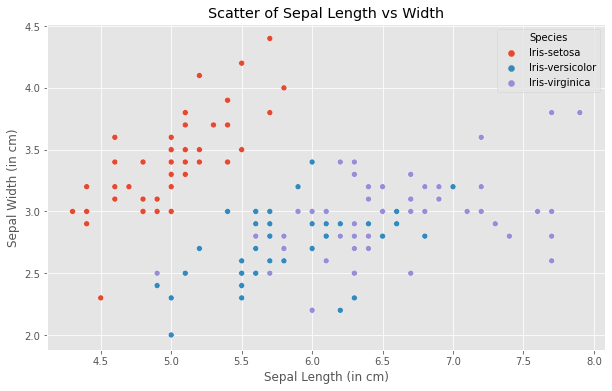

In [13]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title('Scatter of Sepal Length vs Width')
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.show()

`Inference`:
- Sepal Length and Sepal Width are very different for Setosa, again, compared to the rest.
- It is difficult to tell Virginica and Versicolor apart from their combined cluster.

### 4. Distributions of the Sepal Length and Width

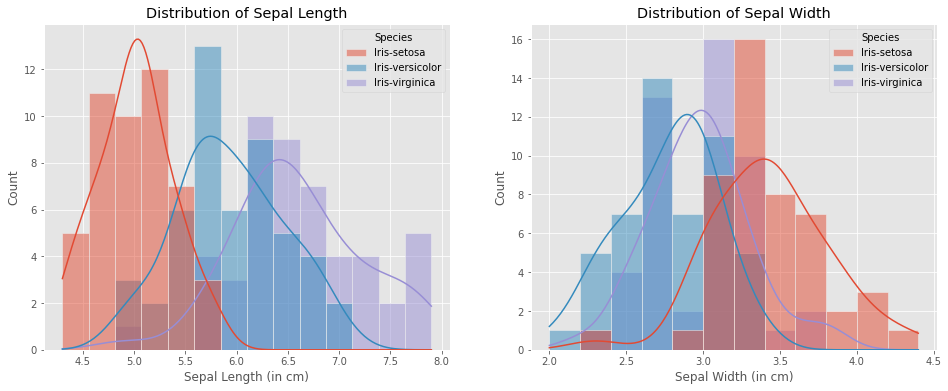

In [14]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.histplot(x='SepalLengthCm', data=df, bins=14, kde=True, ax=ax[0], hue='Species')
ax[0].set_title('Distribution of Sepal Length')
ax[0].set_xlabel('Sepal Length (in cm)')

sns.histplot(x='SepalWidthCm', data=df, bins=12, kde=True, ax=ax[1], hue='Species')
ax[1].set_title('Distribution of Sepal Width')
ax[1].set_xlabel('Sepal Width (in cm)')

plt.show()

`Inference`:
- Setosa has the smallest sepal length, but largest width.

### 5. Boxplot of all the columns

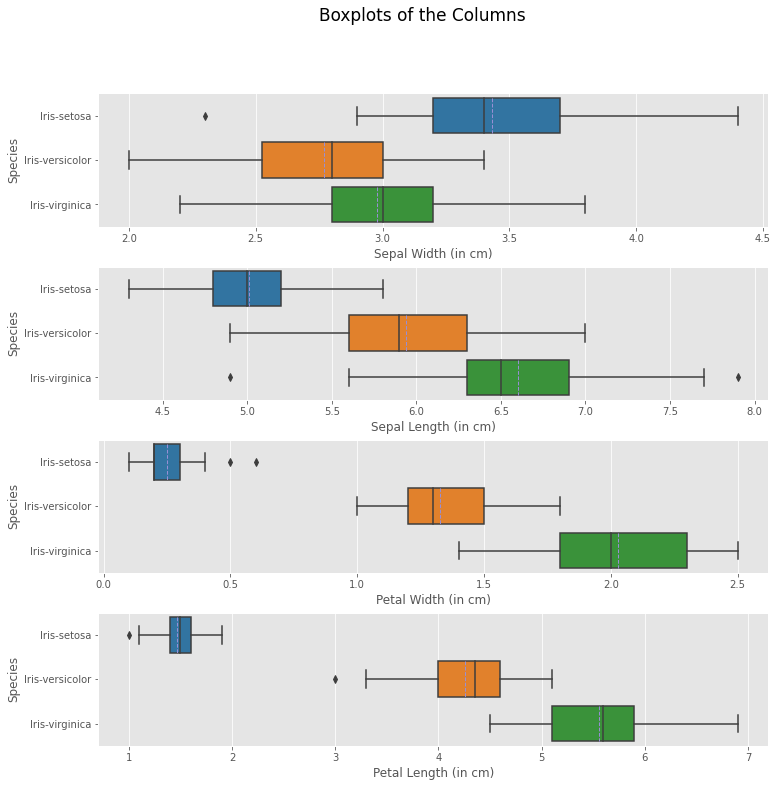

In [15]:
fig, ax = plt.subplots(4,1, figsize=(12,12))

fig.suptitle('Boxplots of the Columns', fontsize=17)

sns.boxplot(data=df, ax=ax[0], x='SepalWidthCm', y='Species', showmeans=True, meanline=True, palette=sns.color_palette('tab10', 3))
ax[0].set_xlabel('Sepal Width (in cm)')

sns.boxplot(data=df, ax=ax[1], x='SepalLengthCm', y='Species', showmeans=True, meanline=True, palette=sns.color_palette('tab10', 3))
ax[1].set_xlabel('Sepal Length (in cm)')

sns.boxplot(data=df, ax=ax[2], x='PetalWidthCm', y='Species', showmeans=True, meanline=True, palette=sns.color_palette('tab10', 3))
ax[2].set_xlabel('Petal Width (in cm)')

sns.boxplot(data=df, ax=ax[3], x='PetalLengthCm', y='Species', showmeans=True, meanline=True, palette=sns.color_palette('tab10', 3))
ax[3].set_xlabel('Petal Length (in cm)')

plt.subplots_adjust(hspace=0.3)
plt.show()

`Inference`: 
- Setosa has the smallest petal width and length in all, making it very easily separable.
- Setosa has the largest median and mean value for sepal width.
- The other 2 classes overlap, usually beyond the 75% percentile mark (Q3). 
- Apart from sepal width, the oreder of the mean and median values as as follows : setosa < versicolor < virginica.

## Feature Engineering

#### Before doing any kind of scaling, we would have to do a train test split.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Species']), df['Species'], test_size=0.3, random_state=42)

In [18]:
X_train.shape

(102, 4)

#### We can scale our input features and Label encode our target variable as it is in form of strings.

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [20]:
transformer = ColumnTransformer(transformers=[
    ('ss', StandardScaler(),list(X_train.columns))
    # for more transformations
])

In [21]:
X_train_transformed = transformer.fit_transform(X_train)

In [22]:
X_train_transformed.shape

(102, 4)

In [23]:
encoder = LabelEncoder()

In [24]:
y_train_transformed = encoder.fit_transform(y_train)

In [25]:
y_train_transformed

array([1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1,
       1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [26]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Now, we will repeat the same operation with the Test data

In [27]:
X_test_transformed = transformer.transform(X_test)
y_test_transformed = encoder.transform(y_test)

## Modelling

Now, we will model our train data using the 3 classification algorithms we mentioned earlier.

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### 1. Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_transformed, y_train_transformed)

GaussianNB()

In [30]:
nb.classes_

array([0, 1, 2])

Predicting the probabilities of a data point for each of the given classes, and also the results.

In [31]:
y_pred_prob = nb.predict_proba(X_test_transformed)
y_pred = nb.predict(X_test_transformed)

#### Classification Report

In [32]:
print(classification_report(y_pred, y_test_transformed))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



The accuracy of the Naive Bayes Classifier is `98 %`. Though we do not usually consider accuracy for classification algorithms because of imbalance data, but in our example our training set seems balanced.

#### Confusion Matrix

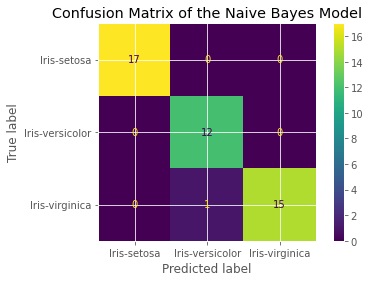

In [33]:
cm = confusion_matrix(y_test_transformed, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix of the Naive Bayes Model')
plt.show()

The Naive Bayes Model makes only only incorrect classification for the iris test dataset. 
It misclassifies a virginica as a versicolor.

#### Plotting the Decision Boundary for Naive Bayes Model

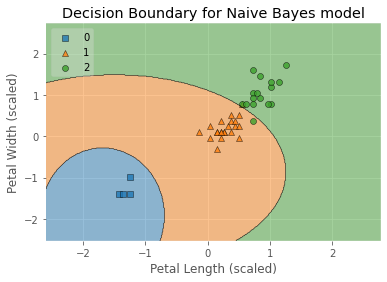

In [34]:
from mlxtend.plotting import plot_decision_regions
mean = 0
std = 1

plot_decision_regions(X_train_transformed, y_train_transformed, nb, feature_index=[2,3], filler_feature_values={0: mean, 1:mean}, filler_feature_ranges={0: std, 1: std}, legend=2)
plt.ylabel('Petal Width (scaled)')
plt.xlabel('Petal Length (scaled)')
plt.title("Decision Boundary for Naive Bayes model")
plt.show()

#### Plotting Probabilities for each class

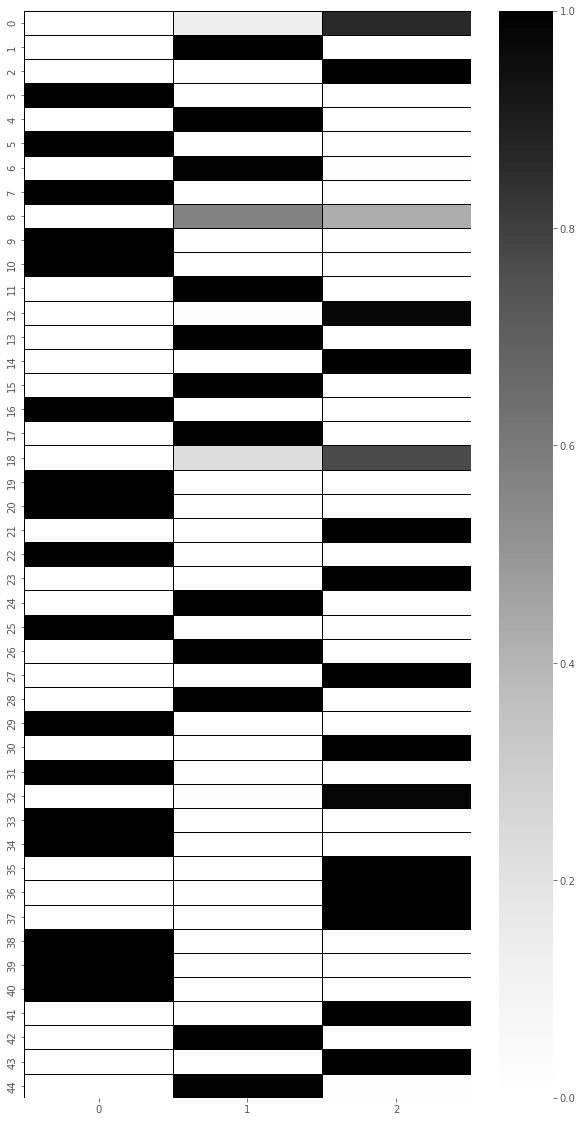

In [35]:
fig = plt.figure(figsize=(10,20))
sns.heatmap(y_pred_prob, cmap='Greys', linewidths=1, linecolor='black')
plt.show()

### 2. K-Nearest Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(6) # choosing k to be 6
knn.fit(X_train_transformed, y_train_transformed)

KNeighborsClassifier(n_neighbors=6)

In [37]:
knn.classes_

array([0, 1, 2])

For the KNN, we are using Euclidean distance, given by `metric = 'minkowski'` and `p = 2`, which is minkowski's distance raised to the power 2, i.e. Euclidean distance.

In [38]:
knn.metric

'minkowski'

In [39]:
knn.p

2

Predicting the probabilities of a data point for each of the given classes, and also the results.

In [40]:
y_pred_prob = knn.predict_proba(X_test_transformed)
y_pred = knn.predict(X_test_transformed)

#### Classification Report

In [41]:
print(classification_report(y_pred, y_test_transformed))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



The accuracy of the KNN Classifier is `96 %`.

#### Confusion Matrix

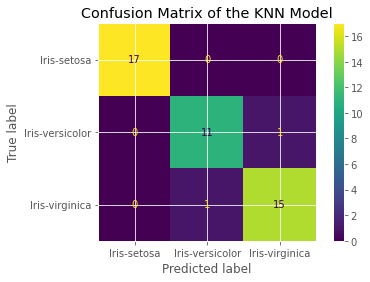

In [42]:
cm = confusion_matrix(y_test_transformed, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix of the KNN Model')
plt.show()

The KNN model makes 2 mistakes. It classifies one versicolor as virginica and one virginica as versicolor.

#### Plotting the Decision Boundary for KNN Model

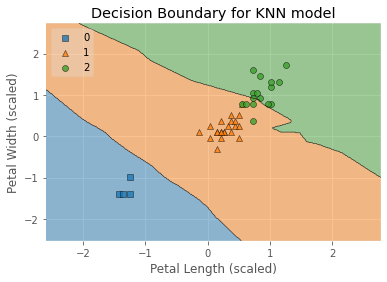

In [43]:
from mlxtend.plotting import plot_decision_regions
mean = 0
std = 1

plot_decision_regions(X_train_transformed, y_train_transformed, knn, feature_index=[2,3], filler_feature_values={0: mean, 1:mean}, filler_feature_ranges={0: std, 1: std}, legend=2)
plt.ylabel('Petal Width (scaled)')
plt.xlabel('Petal Length (scaled)')
plt.title("Decision Boundary for KNN model")
plt.show()

#### Plotting Probabilities for each class of the test samples

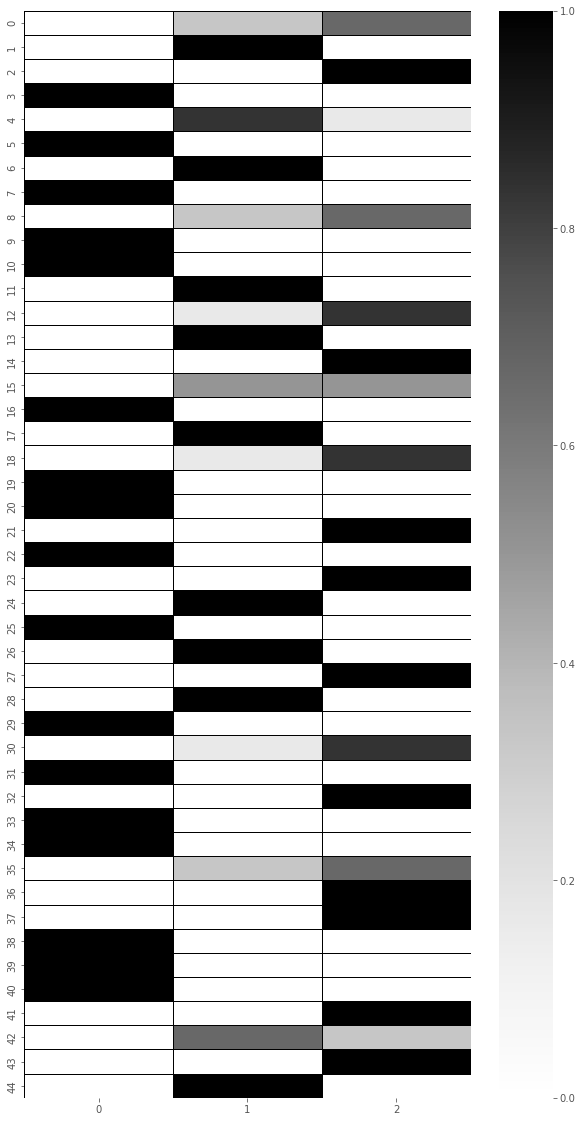

In [44]:
fig = plt.figure(figsize=(10,20))
sns.heatmap(y_pred_prob, cmap='Greys', linewidths=1, linecolor='black')
plt.show()

### 3. Multi-Class Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_transformed, y_train_transformed)

LogisticRegression()

In [46]:
logit.classes_

array([0, 1, 2])

Usually Logistic Regression is for binary classification, but can be extended using Softmax Regression (or Multi-Class Logistic Regression).

In [47]:
logit.multi_class

'auto'

Predicting the probabilities of a data point for each of the given classes, and also the results.

In [48]:
y_pred_prob = logit.predict_proba(X_test_transformed)
y_pred = logit.predict(X_test_transformed)

#### Classification Report

In [49]:
print(classification_report(y_pred, y_test_transformed))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The accuracy of the Multi-Class Logistic Regression is `98 %`.

#### Confusion Matrix

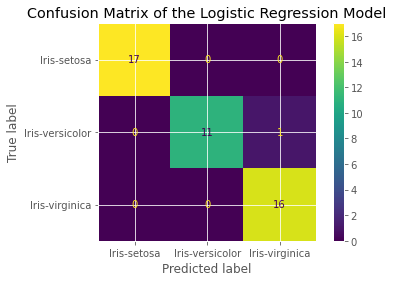

In [50]:
cm = confusion_matrix(y_test_transformed, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

The Logistic Regression Model makes only one mistake as Naive Bayes. But, the difference between results of the Naive Bayes and Logistic is that Logistic Regression classifies a versicolor as a virginica and Naive Bayes did the exact opposite.

#### Plotting the Decision Boundary for Logistic Regression Model

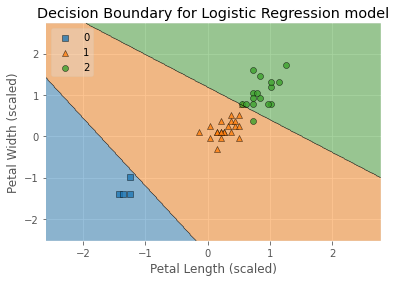

In [51]:
from mlxtend.plotting import plot_decision_regions
mean = 0
std = 1

plot_decision_regions(X_train_transformed, y_train_transformed, logit, feature_index=[2,3], filler_feature_values={0: mean, 1:mean}, filler_feature_ranges={0: std, 1: std}, legend=2)
plt.ylabel('Petal Width (scaled)')
plt.xlabel('Petal Length (scaled)')
plt.title("Decision Boundary for Logistic Regression model")
plt.show()

#### Plotting Probabilities for each class

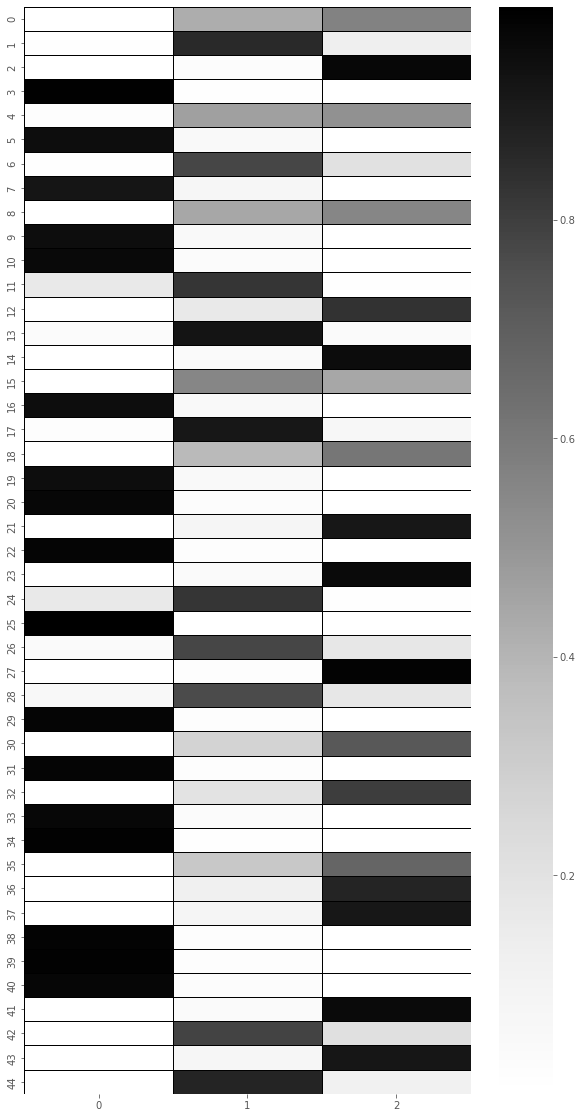

In [52]:
fig = plt.figure(figsize=(10,20))
sns.heatmap(y_pred_prob, cmap='Greys', linewidths=1, linecolor='black')
plt.show()

### 4. Support Vector Machines

In [53]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf')
SVM.fit(X_train_transformed, y_train_transformed)

SVC()

In [54]:
SVM.kernel

'rbf'

We will be using the Radial Basis Function or the Gaussian Kernel.

Predicting the results.

In [55]:
y_pred = SVM.predict(X_test_transformed)

#### Classification Report

In [56]:
print(classification_report(y_pred, y_test_transformed))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



The accuracy of the Support Vector Machines is `96 %`.

#### Confusion Matrix

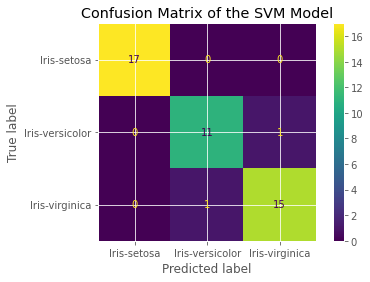

In [57]:
cm = confusion_matrix(y_test_transformed, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot()
plt.title('Confusion Matrix of the SVM Model')
plt.show()

The results are similar as in KNN, so can we say that algoritms with a 3-letter acronym are slightly lagging behind other algorithms - KIDDING !!!

#### Plotting the Decision Boundary for SVM Model

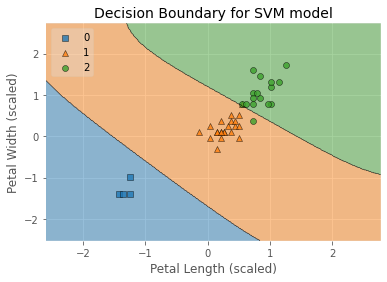

In [58]:
from mlxtend.plotting import plot_decision_regions
mean = 0
std = 1

plot_decision_regions(X_train_transformed, y_train_transformed, SVM, feature_index=[2,3], filler_feature_values={0: mean, 1:mean}, filler_feature_ranges={0: std, 1: std}, legend=2)
plt.ylabel('Petal Width (scaled)')
plt.xlabel('Petal Length (scaled)')
plt.title("Decision Boundary for SVM model", size = 14)
plt.show()

#### Plotting Probabilities for each class

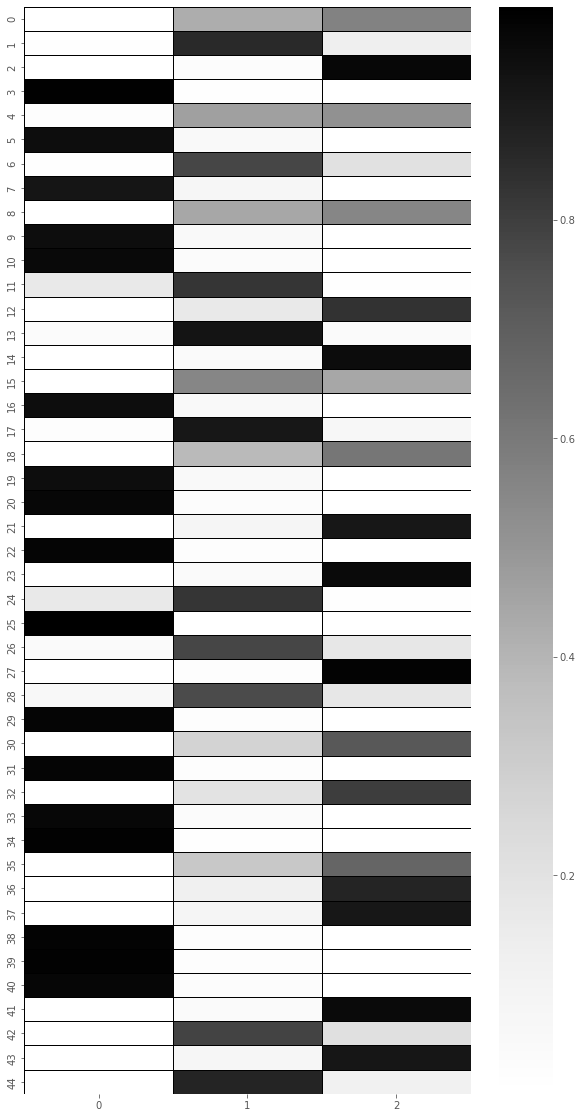

In [59]:
fig = plt.figure(figsize=(10,20))
sns.heatmap(y_pred_prob, cmap='Greys', linewidths=1, linecolor='black')
plt.show()

## Conclusion

- The accuracy of KNN and SVM is a bit lower in comparison to Naive Bayes and Logistic Regression, obviously the better algorithm cannot be declared on the basis of this as we are working on a toy dataset.
- The precision and recall for 'Setosa' is 100 %, meaning it is always classified accurately. This has always been pretty clear since we plotted the scatter plot of Petal Length vs Petal Width.
- The only point of confusion is among the two other classes, 'Versicolor' and 'Virginica', also seen from the scatter plots.

# The End